# 01_EDA — Exploración del dataset `diabetes_dataset.csv`


# Importación de librerías

In [37]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Lectura del dataset

In [38]:
df = pd.read_csv('../data/diabetes_dataset.csv')
df.head()

,age,gender,ethnicity,education_level,income_level,employment_status,smoking_status,alcohol_consumption_per_week,physical_activity_minutes_per_week,diet_score,...,hdl_cholesterol,ldl_cholesterol,triglycerides,glucose_fasting,glucose_postprandial,insulin_level,hba1c,diabetes_risk_score,diabetes_stage,diagnosed_diabetes
0,58,Male,Asian,Highschool,Lower-Middle,Employed,Never,0,215,5.7,...,41,160,145,136,236,6.36,8.18,29.6,Type 2,1
1,48,Female,White,Highschool,Middle,Employed,Former,1,143,6.7,...,55,50,30,93,150,2.00,5.63,23.0,No Diabetes,0
2,60,Male,Hispanic,Highschool,Middle,Unemployed,Never,1,57,6.4,...,66,99,36,118,195,5.07,7.51,44.7,Type 2,1
3,74,Female,Black,Highschool,Low,Retired,Never,0,49,3.4,...,50,79,140,139,253,5.28,9.03,38.2,Type 2,1
4,46,Male,White,Graduate,Middle,Retired,Never,1,109,7.2,...,52,125,160,137,184,12.74,7.20,23.5,Type 2,1


# Identificación de tipos de variables



In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 31 columns):
 #   Column                              Non-Null Count   Dtype  
---  ------                              --------------   -----  
 0   age                                 100000 non-null  int64  
 1   gender                              100000 non-null  object 
 2   ethnicity                           100000 non-null  object 
 3   education_level                     100000 non-null  object 
 4   income_level                        100000 non-null  object 
 5   employment_status                   100000 non-null  object 
 6   smoking_status                      100000 non-null  object 
 7   alcohol_consumption_per_week        100000 non-null  int64  
 8   physical_activity_minutes_per_week  100000 non-null  int64  
 9   diet_score                          100000 non-null  float64
 10  sleep_hours_per_day                 100000 non-null  float64
 11  screen_time_hours_per_day  

**Nota:** aunque las variables "family_history_diabetes", "hypertension_history", "cardiovascular_history" y “diagnosed_diabetes” se encuentran codificadas como cuantitativas (int64), en realidad son variables binarias de tipo categórico, donde 1 indica presencia del atributo y 0 su ausencia.

# Recodificación de variables binarias

In [40]:
historia_familiar_diabetes = {
    0: 'No',
    1: 'Sí'
}

df['family_history_diabetes'] = df['family_history_diabetes'].replace(historia_familiar_diabetes)

In [41]:
historia_hipertensión = {
    0: 'No',
    1: 'Sí'
}

df['hypertension_history'] = df['hypertension_history'].replace(historia_hipertensión)

In [42]:
historia_cardiovascular = {
    0: 'No',
    1: 'Sí'
}

df['cardiovascular_history'] = df['cardiovascular_history'].replace(historia_cardiovascular)

In [43]:
diagnóstico_diabetes = {
    0: 'No',
    1: 'Sí'
}

df['diagnosed_diabetes'] = df['diagnosed_diabetes'].replace(diagnóstico_diabetes)

# Dataset recodificado

In [44]:
df.to_csv('diabetes_dataset_recoded.csv', index=False)
df = pd.read_csv("diabetes_dataset_recoded.csv")

# Datos descriptivos

## Variables numéricas

In [45]:
numericas = df.select_dtypes(include=['int64', 'float64'])

descriptivos_num = numericas.describe().T  
descriptivos_num['var'] = numericas.var()  
descriptivos_num['missing'] = numericas.isnull().sum() 

print()
display(descriptivos_num)

,count,mean,std,min,25%,50%,75%,max,var,missing
age,100000.0,50.120410,15.604600,18.00,39.00,50.00,61.00,90.00,243.503526,0
alcohol_consumption_per_week,100000.0,2.003670,1.417779,0.00,1.00,2.00,3.00,10.00,2.010097,0
physical_activity_minutes_per_week,100000.0,118.911640,84.409662,0.00,57.00,100.00,160.00,833.00,7124.991122,0
diet_score,100000.0,5.994787,1.780954,0.00,4.80,6.00,7.20,10.00,3.171798,0
sleep_hours_per_day,100000.0,6.997818,1.094622,3.00,6.30,7.00,7.70,10.00,1.198198,0
screen_time_hours_per_day,100000.0,5.996468,2.468406,0.50,4.30,6.00,7.70,16.80,6.093028,0
bmi,100000.0,25.612653,3.586705,15.00,23.20,25.60,28.00,39.20,12.864451,0
waist_to_hip_ratio,100000.0,0.856078,0.046837,0.67,0.82,0.86,0.89,1.06,0.002194,0
systolic_bp,100000.0,115.799610,14.284073,90.00,106.00,116.00,125.00,179.00,204.034734,0
diastolic_bp,100000.0,75.232490,8.204250,50.00,70.00,75.00,81.00,110.00,67.309711,0


**Nota:** el dataset incluye 100.000 registros y muestra características importantes de la población. La edad promedio es de aproximadamente 50 años, con un rango entre 18 y 90 años y desviación estándar de 15,6, indicando diversidad en la edad de los participantes. En cuanto a hábitos de salud, el consumo de alcohol promedio es bajo (2 veces por semana), mientras que la actividad física semanal tiene una media de 119 minutos, aunque con gran variabilidad (desviación estándar 84,4), lo que sugiere diferencias marcadas entre individuos. El IMC promedio es de 25,6, cercano al límite de sobrepeso, y la relación cintura-cadera promedio es de 0,856, dentro de rangos típicos.

En variables clínicas, la presión arterial sistólica y diastólica promedian 116/75 mmHg, y la frecuencia cardíaca promedio es de 69,6 lpm. Los valores de colesterol total, LDL y HDL muestran medias de 186, 103 y 54 mg/dL respectivamente, mientras que los triglicéridos promedio son 121 mg/dL. En cuanto a glucosa, la media de ayuno es 111 mg/dL y postprandial 160 mg/dL, con niveles de insulina promedio de 9,06 µU/mL y HbA1c de 6,52%, indicando riesgo moderado de diabetes en la población. Finalmente, el diabetes risk score promedio es de 30,2, con amplio rango (2,7 a 67,2), reflejando variabilidad en el riesgo de desarrollar diabetes entre los participantes.

## Variables categóricas

In [46]:
categoricas = df.select_dtypes(include=['object', 'category'])

resumen_categoricas = pd.DataFrame(columns=['count', 'unique', 'top', 'freq'])

for col in categoricas.columns:
    resumen_categoricas.loc[col] = [
        categoricas[col].count(),
        categoricas[col].nunique(),
        categoricas[col].mode()[0],
        categoricas[col].value_counts().iloc[0]
    ]

print()
display(resumen_categoricas)

,count,unique,top,freq
gender,100000,3,Female,50216
ethnicity,100000,5,White,44997
education_level,100000,4,Highschool,44891
income_level,100000,5,Middle,35152
employment_status,100000,4,Employed,60175
smoking_status,100000,3,Never,59813
family_history_diabetes,100000,2,No,78059
hypertension_history,100000,2,No,74920
cardiovascular_history,100000,2,No,92080
diabetes_stage,100000,5,Type 2,59774


**Nota:** el dataset también incluye 100.000 registros con información sobre género, etnia, nivel educativo, ingresos, estado laboral, hábitos de salud y antecedentes médicos. En cuanto a género, la mayoría son mujeres (50.216), mientras que hay tres categorías en total. La etnia más frecuente es blanca (44.997), seguida de otras cuatro categorías, y la mayoría de los participantes tienen educación secundaria (Highschool, 44.891). Respecto al nivel de ingresos, la categoría más común es “Middle” (35.152), y la mayoría están empleados (60.175).

En términos de hábitos de salud, la mayoría nunca han fumado (59.813), y en cuanto a antecedentes médicos, la mayoría no tiene historial familiar de diabetes (78.059), no presenta hipertensión (74.920) y no tiene antecedentes cardiovasculares (92.080). Sobre diabetes, la mayoría se encuentra en la categoría Tipo 2 (59.774) y sí han sido diagnosticados con diabetes (59.998).

En general, los datos muestran que la población del estudio es mayoritariamente femenina, blanca, con educación secundaria, ingresos medios y empleada, y aunque la mayoría tiene un buen historial de salud cardiovascular, hay una proporción importante diagnosticada con diabetes tipo 2.

# Exploración de valores nulos

In [47]:
valores_nulos = df.isnull().sum()
valores_nulos

age                                   0
gender                                0
ethnicity                             0
education_level                       0
income_level                          0
employment_status                     0
smoking_status                        0
alcohol_consumption_per_week          0
physical_activity_minutes_per_week    0
diet_score                            0
sleep_hours_per_day                   0
screen_time_hours_per_day             0
family_history_diabetes               0
hypertension_history                  0
cardiovascular_history                0
bmi                                   0
waist_to_hip_ratio                    0
systolic_bp                           0
diastolic_bp                          0
heart_rate                            0
cholesterol_total                     0
hdl_cholesterol                       0
ldl_cholesterol                       0
triglycerides                         0
glucose_fasting                       0


**Nota:** ninguna variable tiene valos faltantes. 

# Balance de clase de la variable objetivo

Valores únicos en la variable objetivo:


diagnosed_diabetes
Sí    59998
No    40002
Name: count, dtype: int64


Proporciones (por clase):


diagnosed_diabetes
Sí    0.6
No    0.4
Name: proportion, dtype: float64

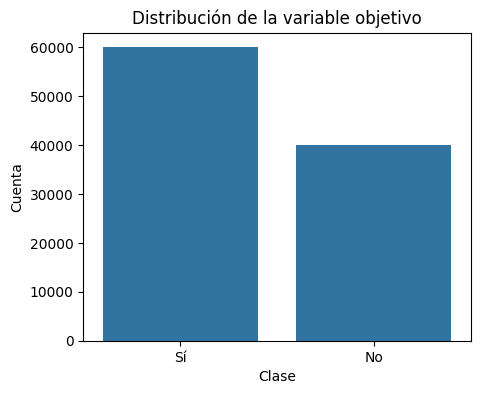

In [48]:
target_col = 'diagnosed_diabetes'

if target_col not in df.columns:
    raise ValueError(f"La columna objetivo '{target_col}' no está en el dataset. Revisa las columnas e identifica cuál es.")

print("Valores únicos en la variable objetivo:")
display(df[target_col].value_counts(dropna=False))

print("\nProporciones (por clase):")
display(df[target_col].value_counts(normalize=True).round(4))

plt.figure(figsize=(5,4))
sns.countplot(x=target_col, data=df)
plt.title('Distribución de la variable objetivo')
plt.xlabel('Clase')
plt.ylabel('Cuenta')
plt.show()

**Nota:** aunque se observa una mayor proporción de personas con diagnóstico de diabetes en comparación con aquellas sin diagnóstico, la diferencia no representa un desbalance de clases significativo.

 # Cardinalidad

In [53]:
cat_cols = df.select_dtypes(include=['object', 'category']).columns.tolist()

if cat_cols:
    card = df[cat_cols].nunique().sort_values(ascending=False)
    print("Número de categorías por columna:")
    print(card.to_frame(name='n_unique'))

for col in cat_cols:
    print(f"\n🔹 {col} ({df[col].nunique()} categorías):")
    print(df[col].unique())

Número de categorías por columna:
                         n_unique
ethnicity                       5
diabetes_stage                  5
income_level                    5
employment_status               4
education_level                 4
gender                          3
smoking_status                  3
family_history_diabetes         2
hypertension_history            2
cardiovascular_history          2
diagnosed_diabetes              2

🔹 gender (3 categorías):
['Male' 'Female' 'Other']

🔹 ethnicity (5 categorías):
['Asian' 'White' 'Hispanic' 'Black' 'Other']

🔹 education_level (4 categorías):
['Highschool' 'Graduate' 'Postgraduate' 'No formal']

🔹 income_level (5 categorías):
['Lower-Middle' 'Middle' 'Low' 'Upper-Middle' 'High']

🔹 employment_status (4 categorías):
['Employed' 'Unemployed' 'Retired' 'Student']

🔹 smoking_status (3 categorías):
['Never' 'Former' 'Current']

🔹 family_history_diabetes (2 categorías):
['No' 'Sí']

🔹 hypertension_history (2 categorías):
['No' 'Sí']

🔹 ca

# Distribuciones univariadas 

## Histogramas

<Figure size 1200x600 with 0 Axes>

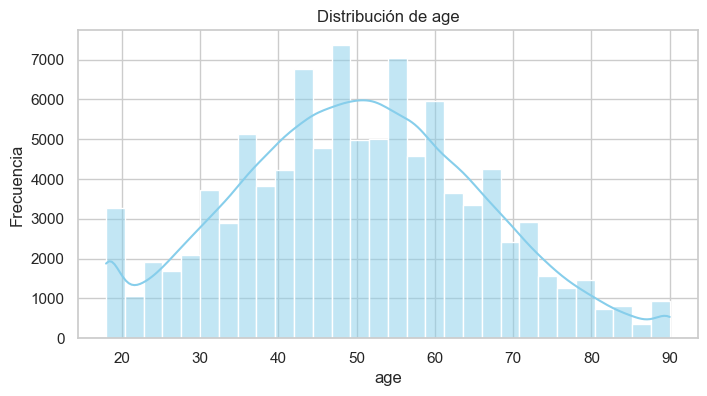

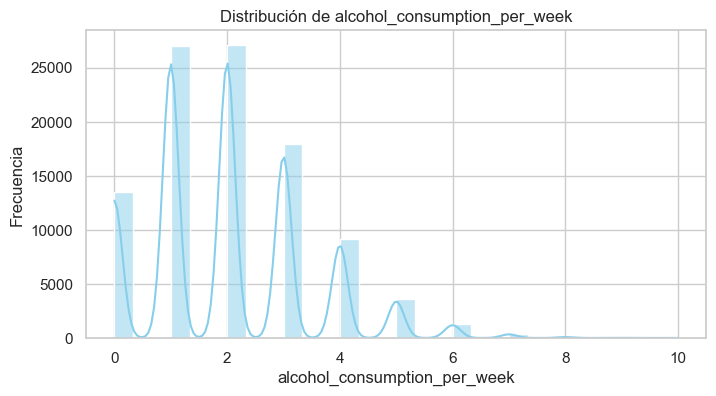

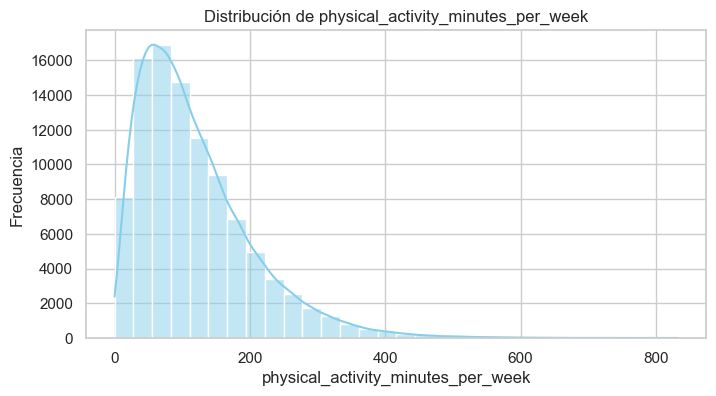

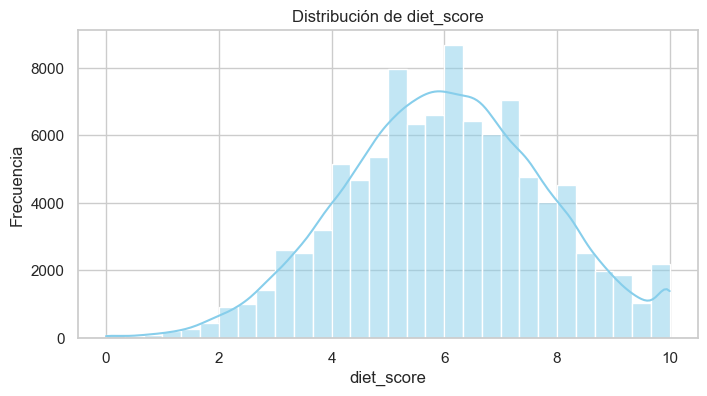

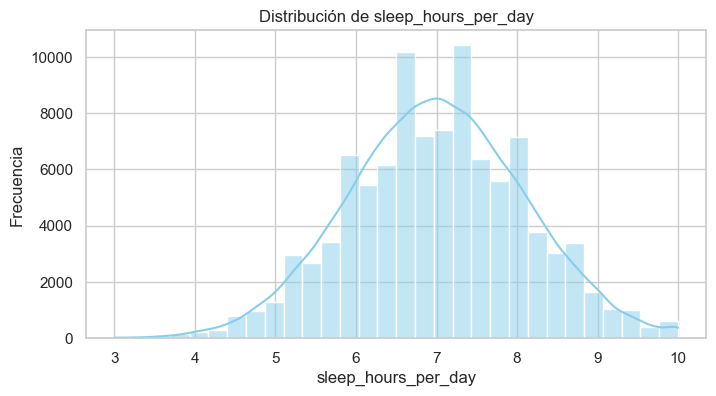

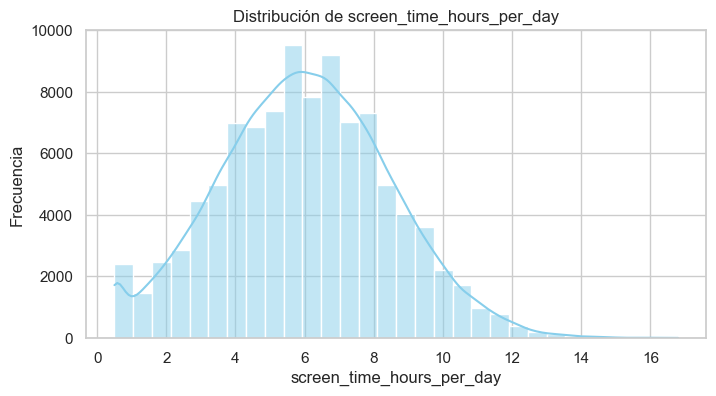

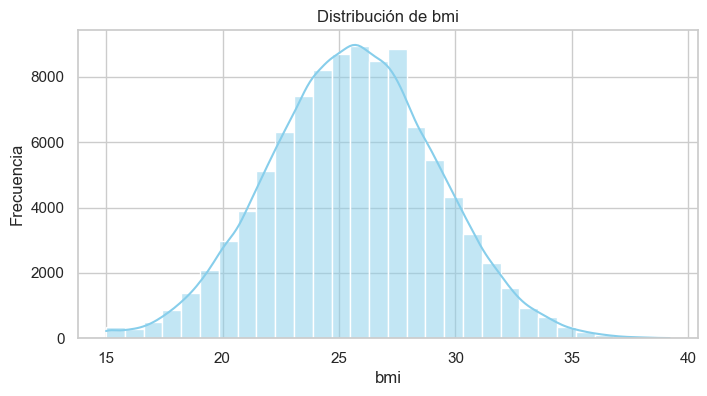

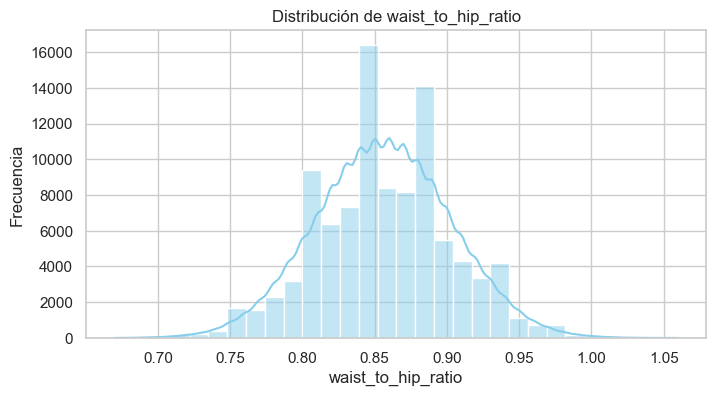

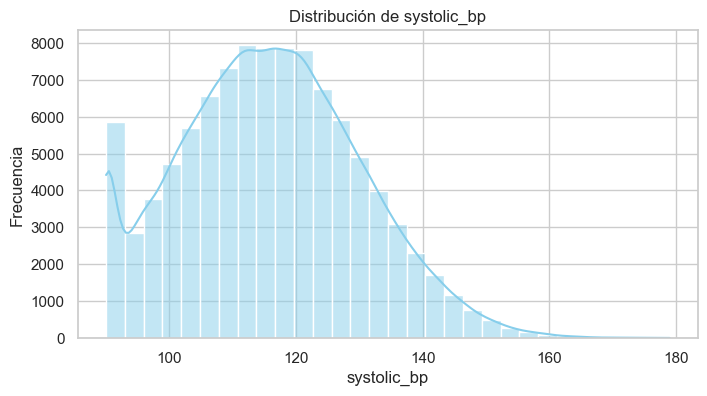

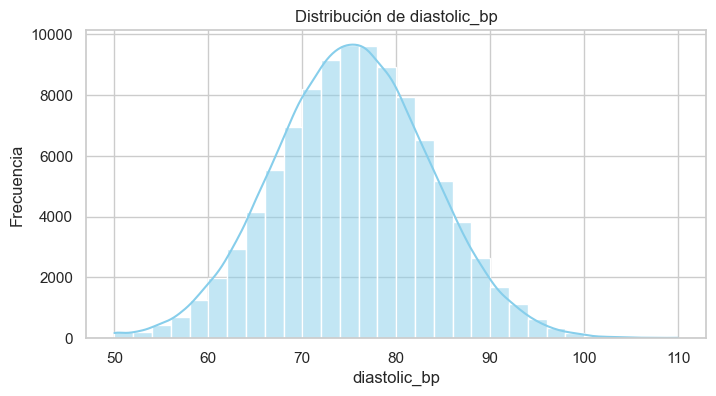

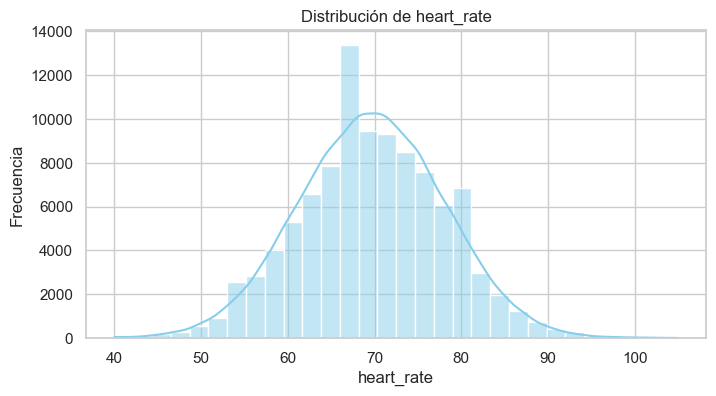

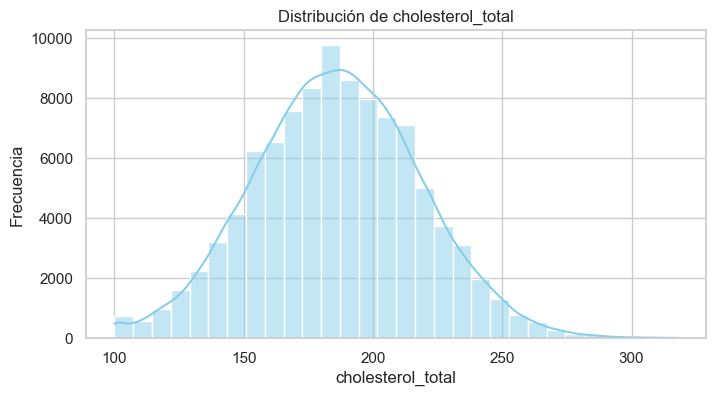

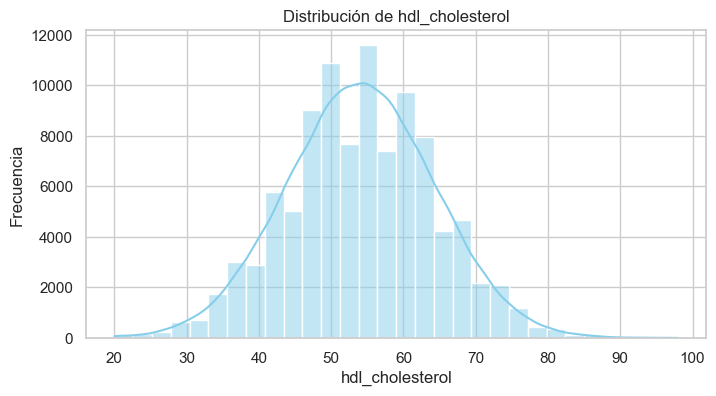

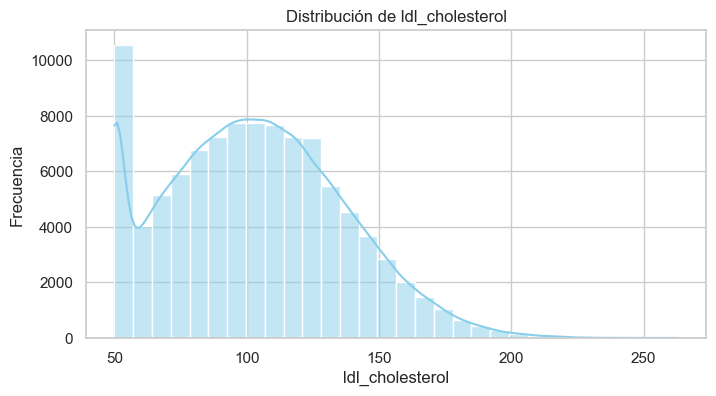

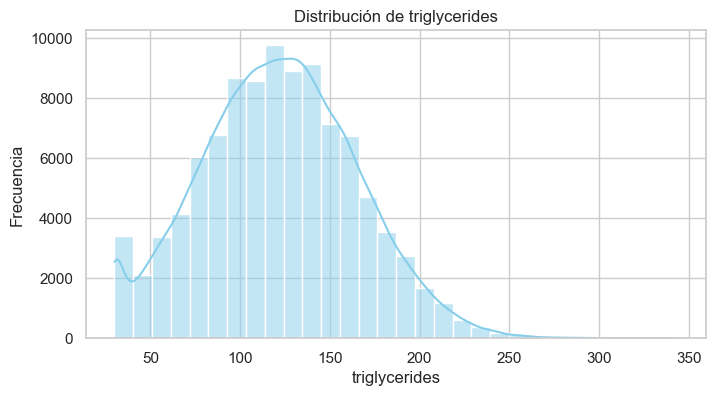

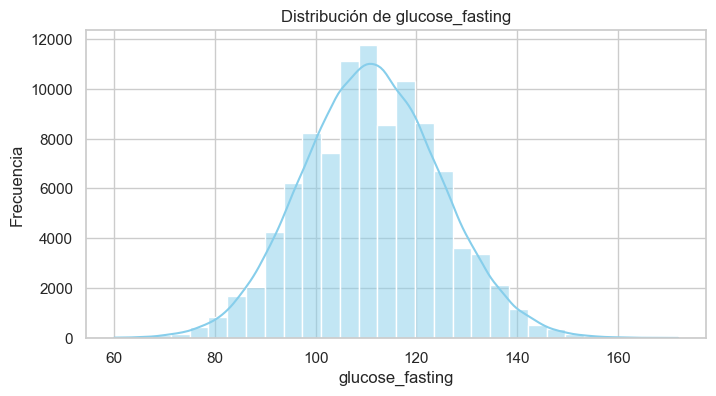

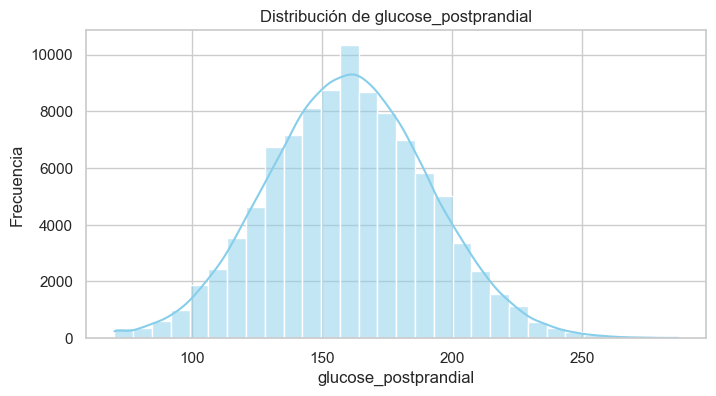

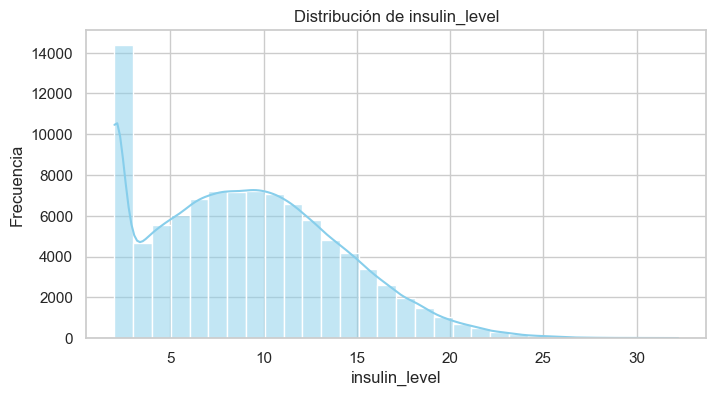

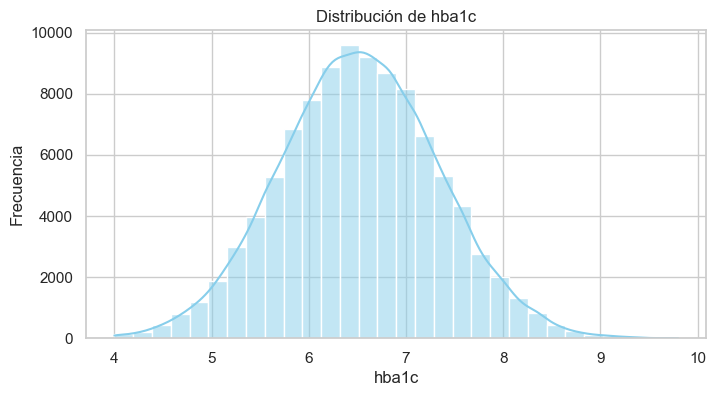

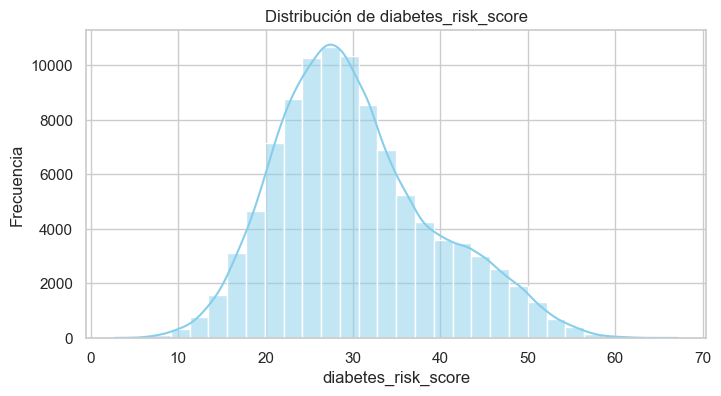

In [57]:
numericas = df.select_dtypes(include=['int64', 'float64']).columns.tolist()

sns.set(style="whitegrid")
plt.figure(figsize=(12, 6))

for col in numericas:
    plt.figure(figsize=(8, 4))
    sns.histplot(df[col], kde=True, bins=30, color='skyblue')
    plt.title(f'Distribución de {col}')
    plt.xlabel(col)
    plt.ylabel('Frecuencia')
    plt.show()

**Nota:** la población analizada muestra un marcado riesgo metabólico y de estilo de vida, siendo la prediabetes el hallazgo clínico más frecuente. Esto se evidencia directamente en el pico de la distribución de la HbA1c (Hemoglobina Glicosilada) centrado en el rango de prediabetes ($6.3\%$), un patrón que es consistente con la alta frecuencia de niveles elevados en la Glucosa en Ayunas y Postprandial. Estos problemas metabólicos están fuertemente correlacionados con el estilo de vida predominante: la gran mayoría de las personas son sedentarias (pico de actividad física cerca de 0 minutos por semana) y pasan un tiempo considerable frente a la pantalla (pico en $\sim 6$ horas/día). La consecuencia directa es que el IMC (Índice de Masa Corporal) se centra en el rango de sobrepeso, indicando una alta prevalencia de exceso de peso.

En cuanto a los indicadores cardiovasculares y lipídicos, si bien la Presión Diastólica y la Frecuencia Cardíaca se agrupan en rangos saludables, existe una considerable minoría en alto riesgo. Esto se ve reflejado en las largas colas derechas (sesgo positivo) de la Presión Sistólica, los Triglicéridos y el Colesterol LDL (el "malo"). Estos patrones indican que, aunque el promedio de la población se mantenga cerca de los límites normales, hay un grupo sustancial de individuos que ya han desarrollado complicaciones como hipertensión o dislipidemia. En conjunto, los datos sugieren que las prioridades de salud pública para esta población deben centrarse en la promoción de la actividad física y la prevención de la diabetes para mitigar el riesgo metabólico y cardiovascular acumulado.

## Boxplots

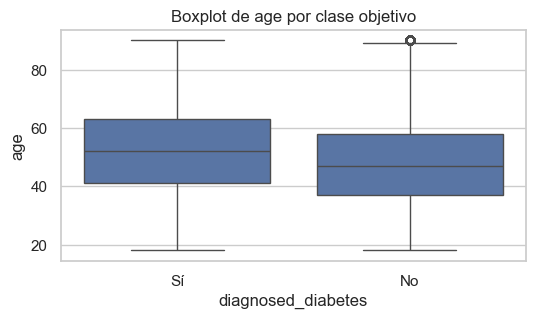

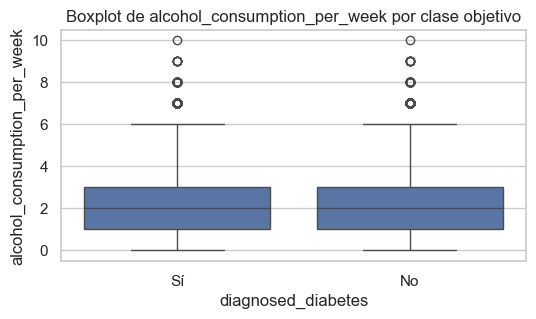

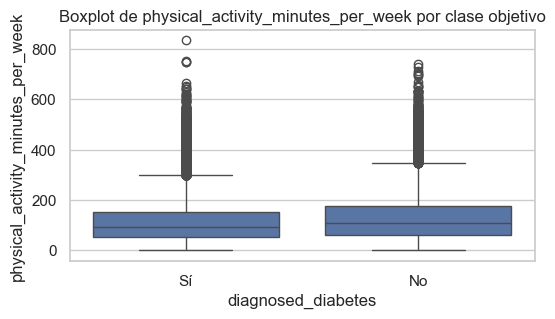

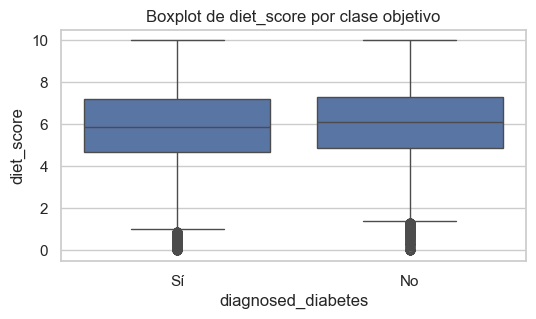

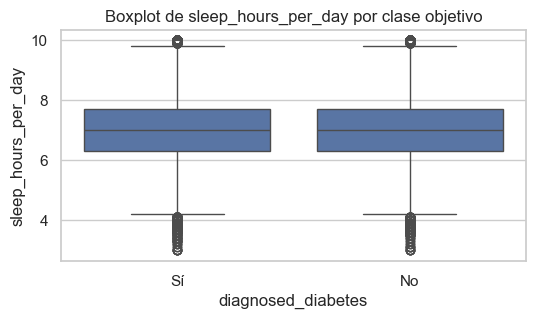

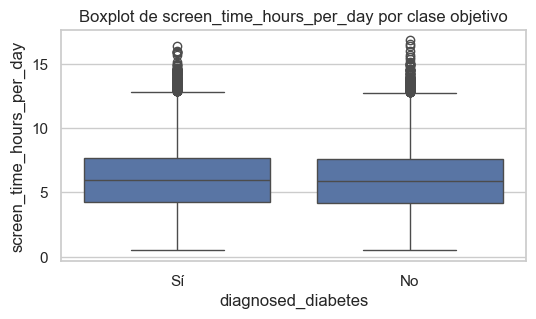

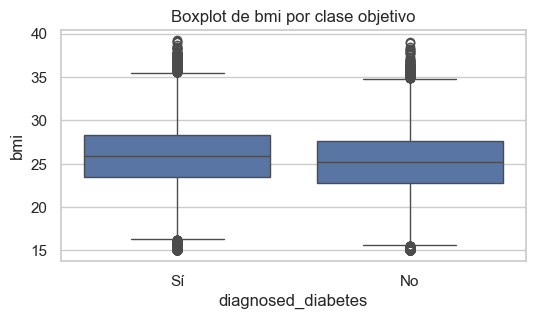

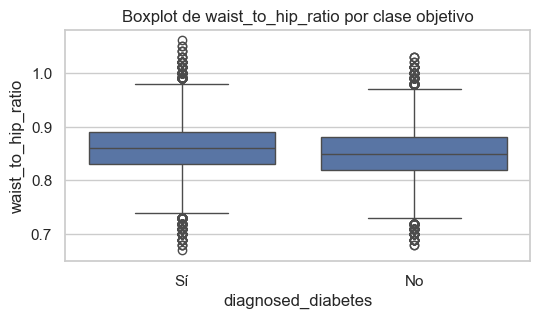

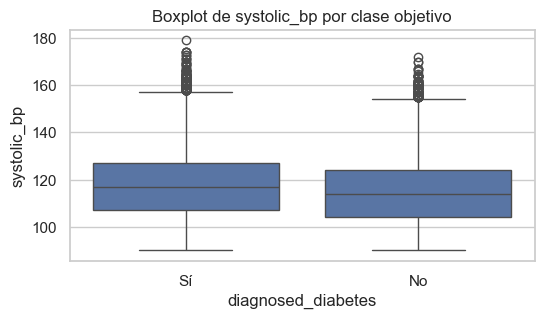

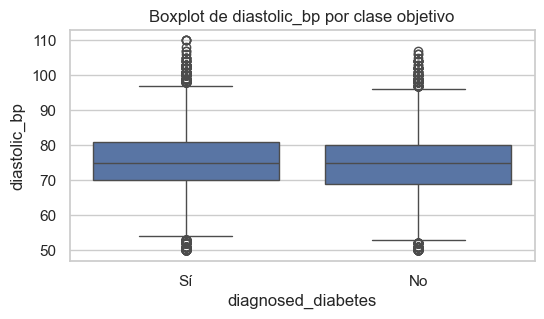

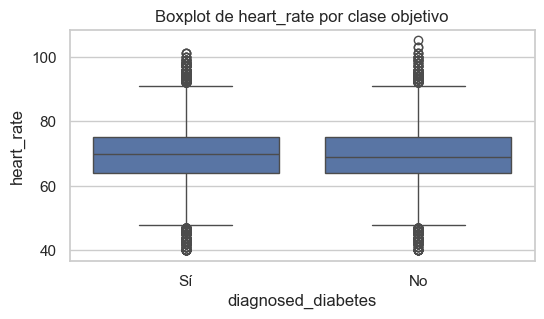

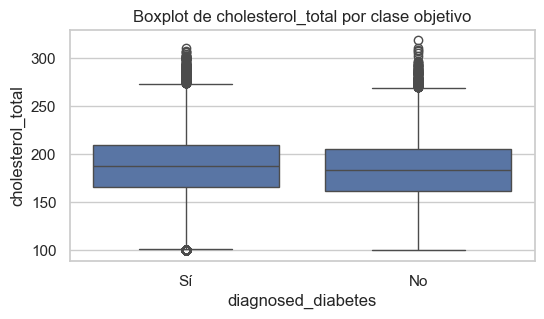

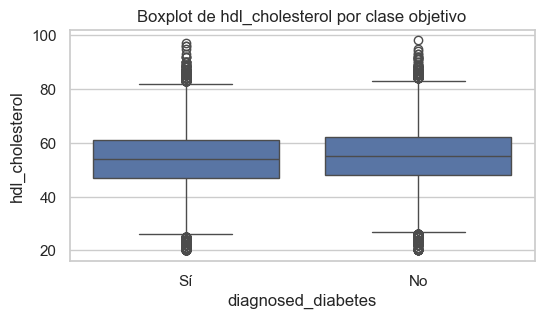

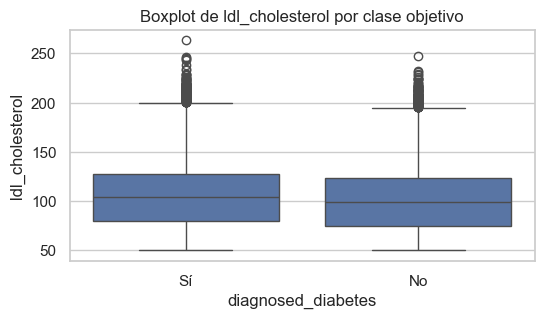

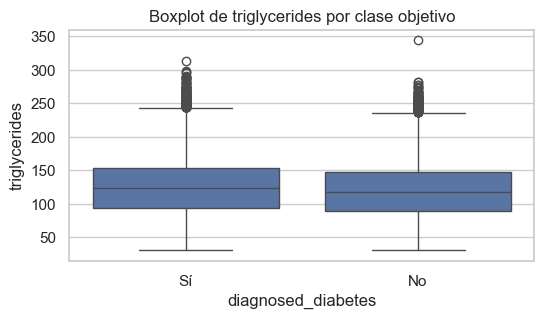

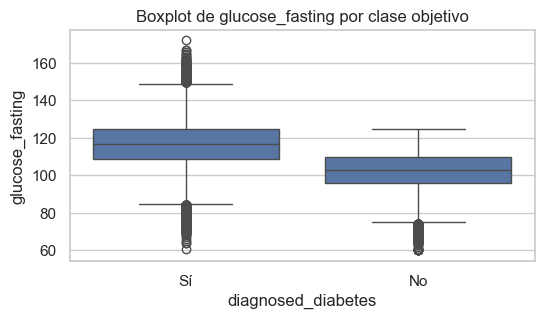

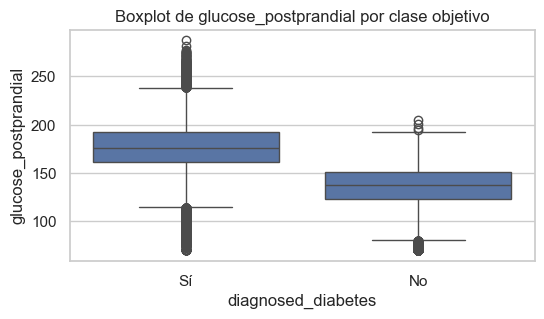

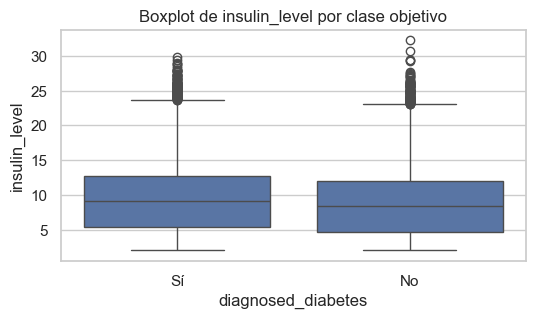

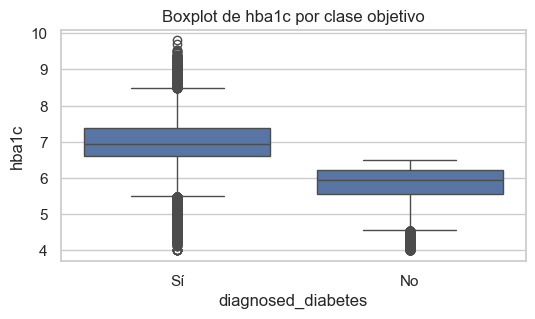

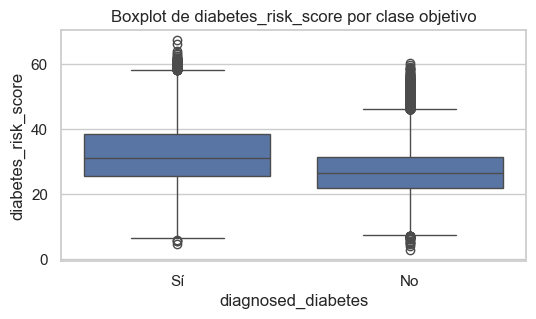

In [60]:
num_cols_filtered = df.select_dtypes(include=['int64', 'float64']).columns.tolist()  
target_col = 'diagnosed_diabetes' 

num_cols_filtered = [col for col in num_cols_filtered if col != target_col]

for col in num_cols_filtered:
    plt.figure(figsize=(6, 3))
    sns.boxplot(x=target_col, y=col, data=df)
    plt.title(f'Boxplot de {col} por clase objetivo')
    plt.xlabel(target_col)
    plt.ylabel(col)
    plt.show()

**Nota:** en los boxplots de hba1c, glucose_postprandial y glucose_fasting, se observa una separación muy clara en las distribuciones de valores entre las dos clases de la variable objetivo. Los pacientes con diagnóstico de diabetes tienden a presentar valores notablemente más altos y con una distribución diferente a los que no tienen el diagnóstico.

Por otra parte, se observa que en la mayoría de las variables existen datos atípicos. 

# Correlaciones de Pearson (relaciones lineales)

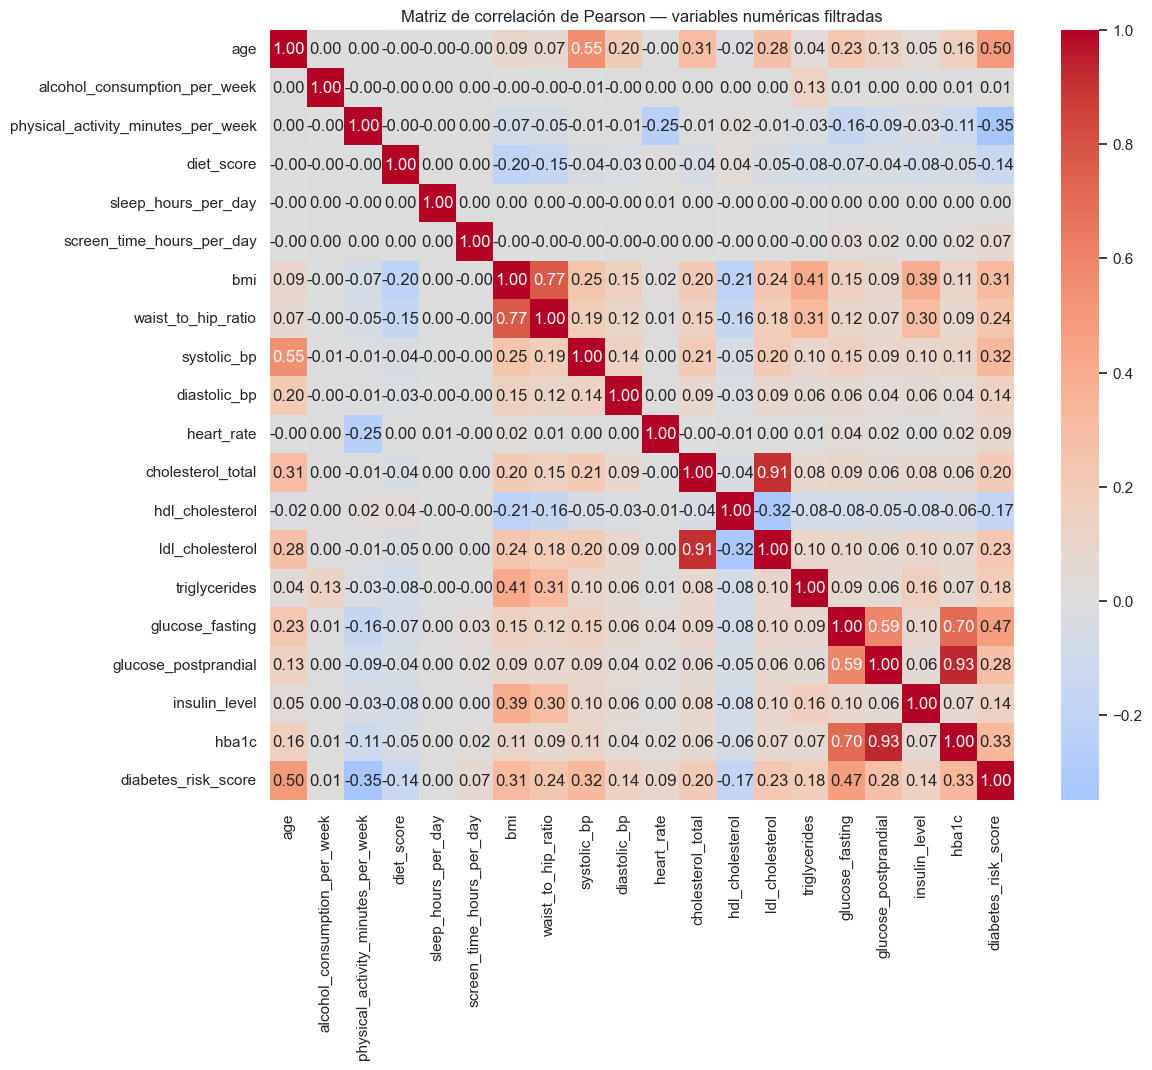

In [65]:
num_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()

corr_pearson = df[num_cols].corr(method='pearson')

plt.figure(figsize=(12, 10))
sns.heatmap(corr_pearson, annot=True, fmt=".2f", cmap='coolwarm', center=0)
plt.title('Matriz de correlación de Pearson — variables numéricas filtradas')
plt.show()

# Correlaciones de Spearman (relaciones no lineales)

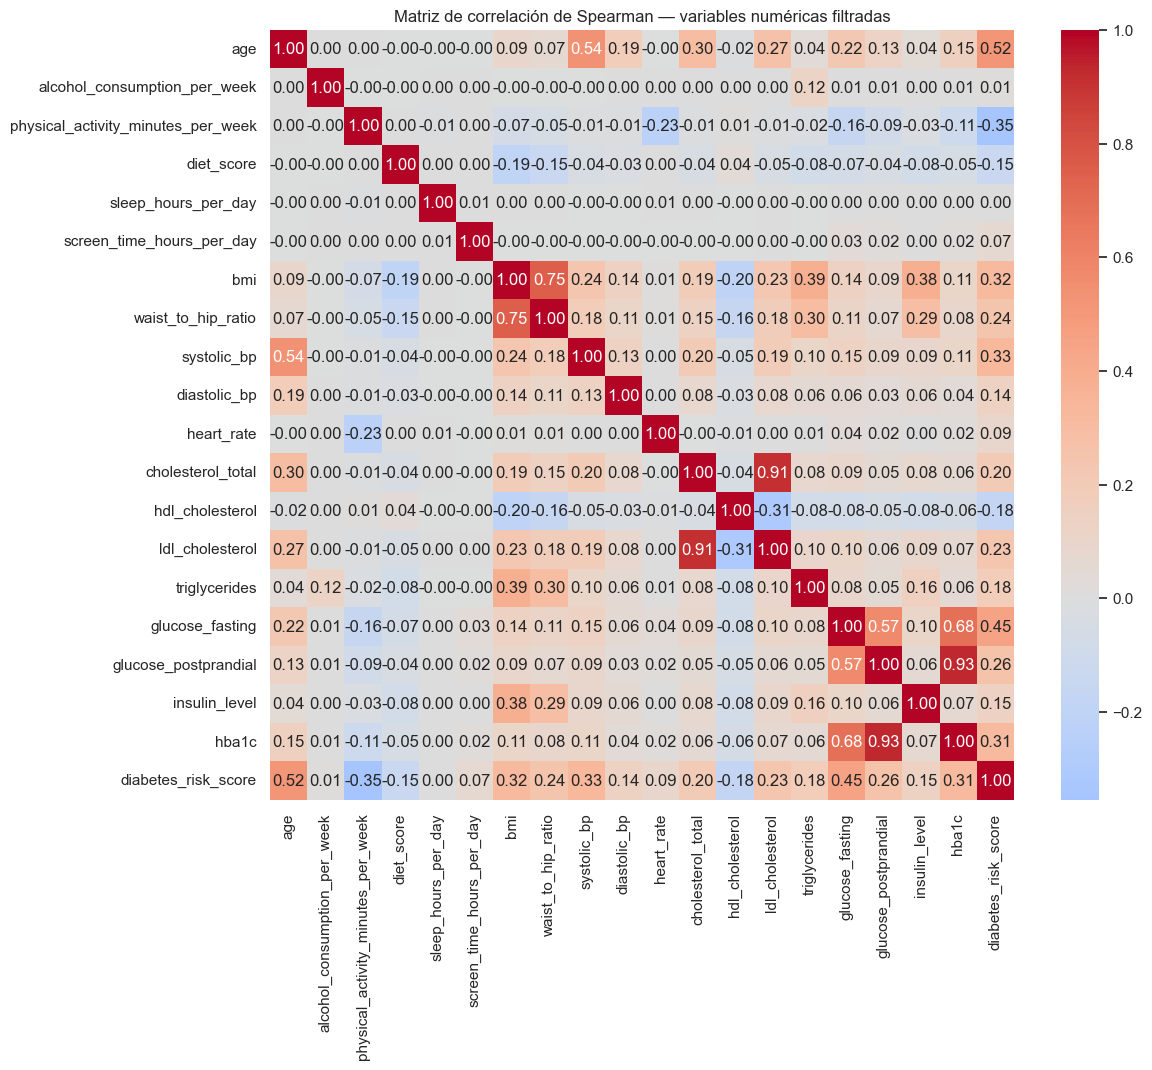

In [64]:
num_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()

corr_spearman = df[num_cols].corr(method='spearman')

plt.figure(figsize=(12, 10))
sns.heatmap(corr_spearman, annot=True, fmt=".2f", cmap='coolwarm', center=0)
plt.title('Matriz de correlación de Spearman — variables numéricas filtradas')
plt.show()

**Nota:** las matrices de correlación de Pearson y Spearman muestran, respectivamente, las relaciones lineales y monotónicas entre las variables numéricas del dataset. En ambas se observan correlaciones muy altas entre ldl_cholesterol y cholesterol_total (0.91) y entre glucose_postprandial y hba1c (0.93), lo que refleja que el LDL constituye un componente principal del colesterol total y que los niveles de glucosa posprandial están estrechamente relacionados con el control glucémico a largo plazo. También destacan las asociaciones entre bmi y waist_to_hip_ratio (0.77, 0.75), indicando que un mayor índice de masa corporal se asocia con mayor acumulación de grasa abdominal.

Entre las correlaciones moderadas, age se relaciona con systolic_bp (0.55, 0.54), mostrando que la presión arterial tiende a incrementarse con la edad. Asimismo, diabetes_risk_score se asocia positivamente con age (0.50, 0.52) y negativamente con physical_activity_minutes_per_week (-0.35, -0.35), evidenciando que una mayor edad y menor actividad física se relacionan con un mayor riesgo de diabetes. Además, glucose_fasting se correlaciona con hba1c (0.70, 0.68) y con diabetes_risk_score (0.47, 0.45), lo que subraya la relevancia de la glucosa en ayunas como indicador de riesgo metabólico. También se observa una correlación moderada entre glucose_postprandial y glucose_fasting (0.57, 0.55), lo que indica que las personas con niveles elevados de glucosa en ayunas tienden a mantener valores altos después de las comidas, aunque ambas medidas reflejan aspectos distintos del metabolismo glucémico. Por su parte, bmi y triglycerides (0.41, 0.39) muestran que un mayor peso corporal se asocia con concentraciones más altas de triglicéridos.

Las correlaciones bajas, cercanas a cero, reflejan relaciones débiles o inexistentes entre algunas variables cardiovasculares y metabólicas, mientras que las negativas sugieren posibles factores protectores, como la actividad física frente al riesgo de diabetes (-0.35) y frente a la frecuencia cardíaca (-0.25, -0.23), o una dieta más saludable asociada con mejores indicadores metabólicos. En conjunto, ambas matrices permiten identificar agrupamientos de variables interrelacionadas —como glucosa y HbA1c, el perfil lipídico y las medidas antropométricas— y sugieren que algunas variables altamente correlacionadas podrían ser redundantes o reflejar dimensiones similares en modelos predictivos.

# Resumen ligero de hallazgos y orientaciones

**Dimensiones del dataset:** 100,000 filas x 30 columnas.
**Variable objetivo:** diagnosed_diabetes. 

**Distribución de clases:** con diabetes = 60% ; sin diabetes = 40%. No se observa un desbalance de clases significativo.

**Variables a conservar y eliminar:** con el propósito de predecir la variable diagnosed_diabetes, se optó por utilizar la mayoría de las variables disponibles como posibles predictores, eliminando únicamente aquellas que podrían generar redundancia o problemas estadísticos. En primer lugar, diabetes_stage se excluirá por ser redundante con la variable objetivo, ya que describe el tipo de diabetes y no aporta información adicional para determinar su presencia o ausencia. En segundo lugar, cholesterol_total y glucose_postprandial mostraron una alta correlación lineal con otras variables (ldl_cholesterol y hba1c, respectivamente), lo que podría ocasionar problemas de multicolinealidad en modelos lineales, como la regresión logística, afectando la estimación de los coeficientes y la interpretación del modelo. Por ello, se conservarán únicamente las variables más representativas de cada par (ldl_cholesterol y hba1c), asegurando la preservación de la información clínica y predictiva sin redundancias.

**Valores faltantes:** el dataset no presenta valores faltantes en ninguna de sus columnas